<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/An%C3%A1lise_Op%C3%A7%C3%A3o_NTCO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [49]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# Parâmetros
inicio = '2022-09-20'
fim = '2023-09-20'
ticker = 'NTCO3.SA'
fonte = 'yahoo'
Selic = 12.75


In [91]:
Ativo = yf.download(ticker, start=inicio)
Ativo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-20,15.29,15.630000,15.08,15.42,15.42,10532300
2022-09-21,15.46,15.880000,15.13,15.53,15.53,9731000
2022-09-22,15.82,16.000000,15.30,15.92,15.92,13656000
2022-09-23,15.50,15.620000,15.06,15.54,15.54,9055300
2022-09-26,15.35,15.560000,14.55,14.58,14.58,13202500
...,...,...,...,...,...,...
2023-09-15,15.17,15.310000,14.87,15.15,15.15,7485000
2023-09-18,15.11,15.930000,15.00,15.45,15.45,9291600
2023-09-19,15.47,15.490000,15.06,15.25,15.25,4137300


In [92]:
Ativo_Ajustado = Ativo.drop(Ativo.columns[[0,1,2,3,5]],axis=1)
Ativo_Ajustado.head(2)

,Adj Close
Date,
2022-09-20,15.42
2022-09-21,15.53


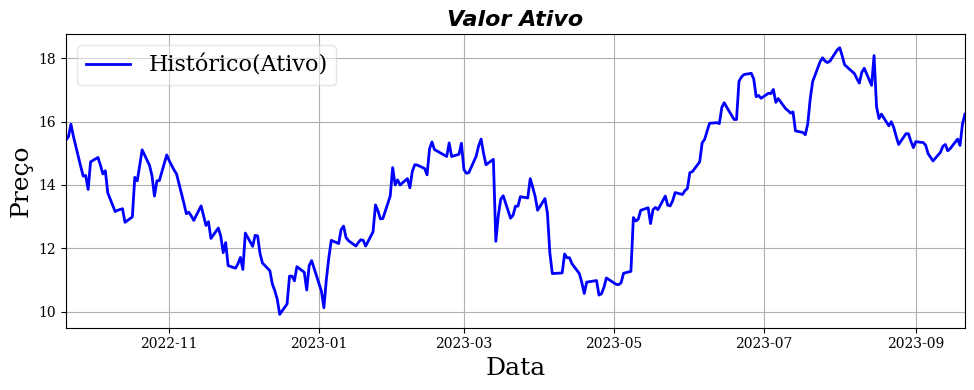

In [94]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Ativo', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Ativo_Ajustado['Adj Close'],label='Histórico(Ativo)', color='blue', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [95]:
Ativo_Ajustado.describe()

,Adj Close
count,252.00000
mean,14.06631
std,2.04983
min,9.91000
25%,12.46250
50%,14.15000
75%,15.45000
max,18.34000


#Cálculo da Volatilidade

In [96]:
Vol = Ativo_Ajustado.std()
Vol

Adj Close    2.04983
dtype: float64

<Axes: xlabel='Date'>

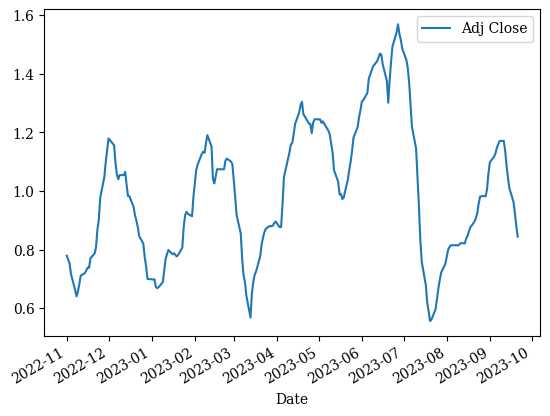

In [97]:
MM_Vol = Ativo_Ajustado.rolling(window=30).std()
MM_Vol.plot()

In [98]:
ultimo_dado = Ativo_Ajustado.iloc[-1]
Ativo = ultimo_dado
Ativo

Adj Close    16.24
Name: 2023-09-21 00:00:00, dtype: float64

In [100]:
Ativo_Máximo = ultimo_dado + 2*Vol
Ativo_Máximo

Adj Close    20.33966
dtype: float64

In [101]:
Ativo_Mínimo = ultimo_dado - 2*Vol
Ativo_Mínimo

Adj Close    12.14034
dtype: float64

<Axes: ylabel='Frequency'>

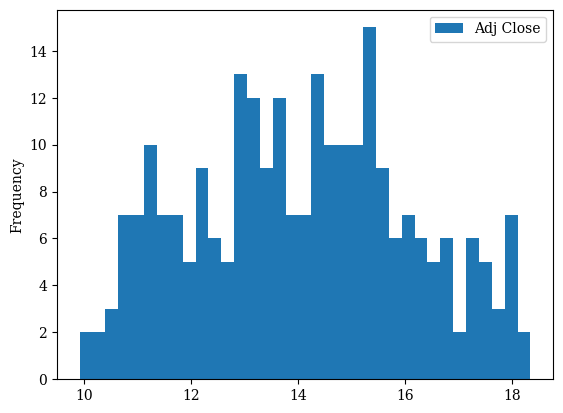

In [102]:
Ativo_Ajustado.plot.hist(bins=35)

In [103]:
div = vbt.YFData.download(ticker,start = inicio).get('Dividends')
div.tail()

Date
2023-09-15 03:00:00+00:00    0.0
2023-09-18 03:00:00+00:00    0.0
2023-09-19 03:00:00+00:00    0.0
2023-09-20 03:00:00+00:00    0.0
2023-09-21 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [104]:
Soma_Div = div.sum()
Soma_Div

0.0

In [105]:
Soma_Div1 = div.rolling('365D').sum()
Soma_Div1.tail()

Date
2023-09-15 03:00:00+00:00    0.0
2023-09-18 03:00:00+00:00    0.0
2023-09-19 03:00:00+00:00    0.0
2023-09-20 03:00:00+00:00    0.0
2023-09-21 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [106]:
DVY = Soma_Div/ultimo_dado
DVY

Adj Close    0.0
Name: 2023-09-21 00:00:00, dtype: float64

In [107]:
Valor_Empresa = Soma_Div/(Selic)
Valor_Empresa

0.0

# Análise dos Prêmios

In [109]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/NTCO3_22_09_23.xlsx")
Opções.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,6.73,1.0,-0.0050,6.64,-6.64,0.0,0.0,9.60,0.00,0.01,0.00,0.0,0.0000,0.0,0.0,0.00
1,5.78,6.34,1.0,-0.0052,6.24,-0.46,0.0,0.0,10.00,0.00,0.01,0.01,0.0,0.0000,0.0,0.0,0.01
2,0.00,5.35,1.0,-0.0057,5.24,-5.24,0.0,0.0,11.00,0.00,0.21,0.02,0.0,0.0000,0.0,0.0,0.02
3,6.40,4.61,1.0,-0.0061,4.49,1.91,0.0,0.0,11.75,0.01,0.20,0.01,0.0,0.0000,0.0,0.0,0.01
4,0.00,4.36,1.0,-0.0063,4.24,-4.24,0.0,0.0,12.00,0.00,0.06,0.04,0.0,-0.0001,0.0,0.0,0.04


In [110]:
Seleção_de_colunas = Opções.iloc[[1,2,3,4,5,6,7,8],[8,12]]
Seleção_de_colunas.head(3)

,Strike,Intrínseco.1
1,10.00,0.0
2,11.00,0.0
3,11.75,0.0


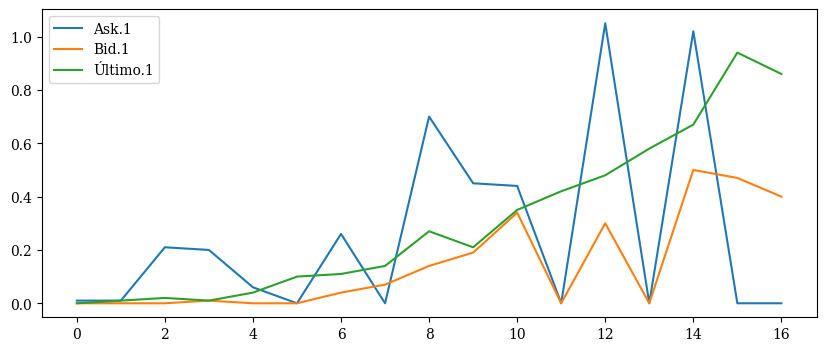

In [111]:
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

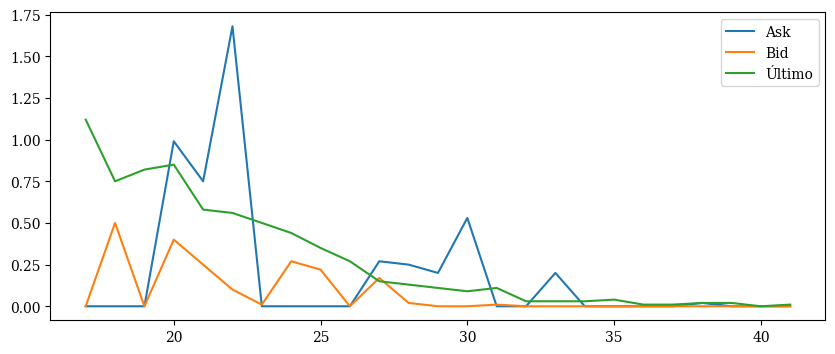

In [112]:
CALLs_OTM = Opções[(Opções['Intrínseco']<=0)]
CALLs_OTM[['Ask','Bid','Último']].plot(figsize = (10,4));

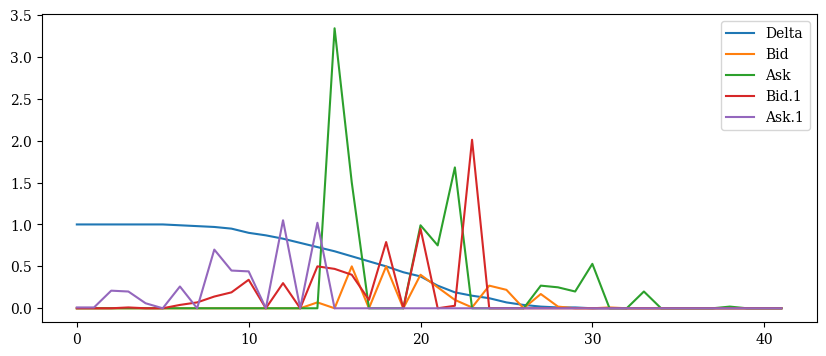

In [113]:
Opções[['Delta', 'Bid','Ask', 'Bid.1','Ask.1']].plot(figsize = (10,4));

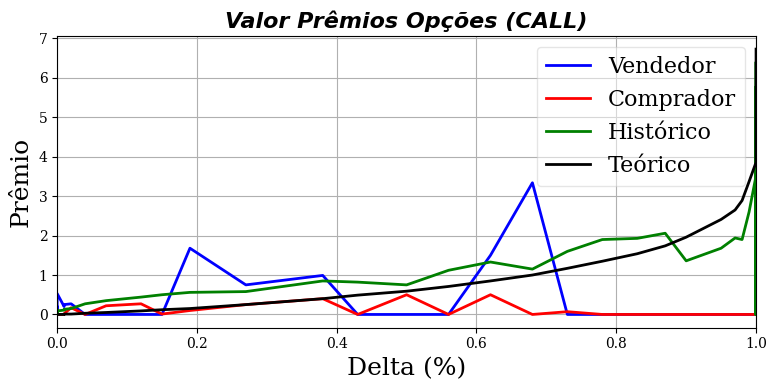

In [114]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

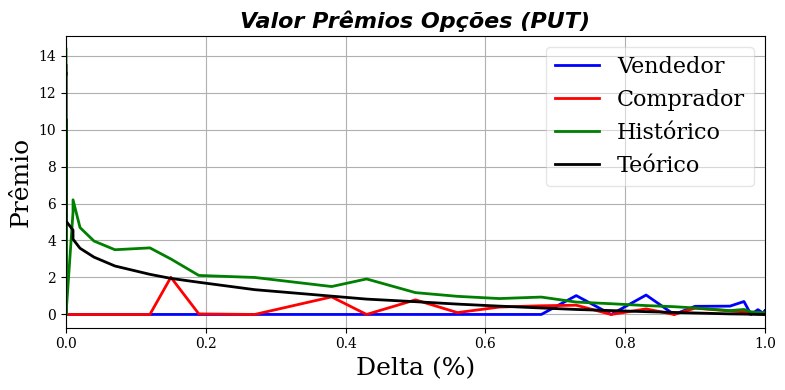

In [115]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,4))
plt.title('Valor Prêmios Opções (PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask.1'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid.1'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último.1'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico.1'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

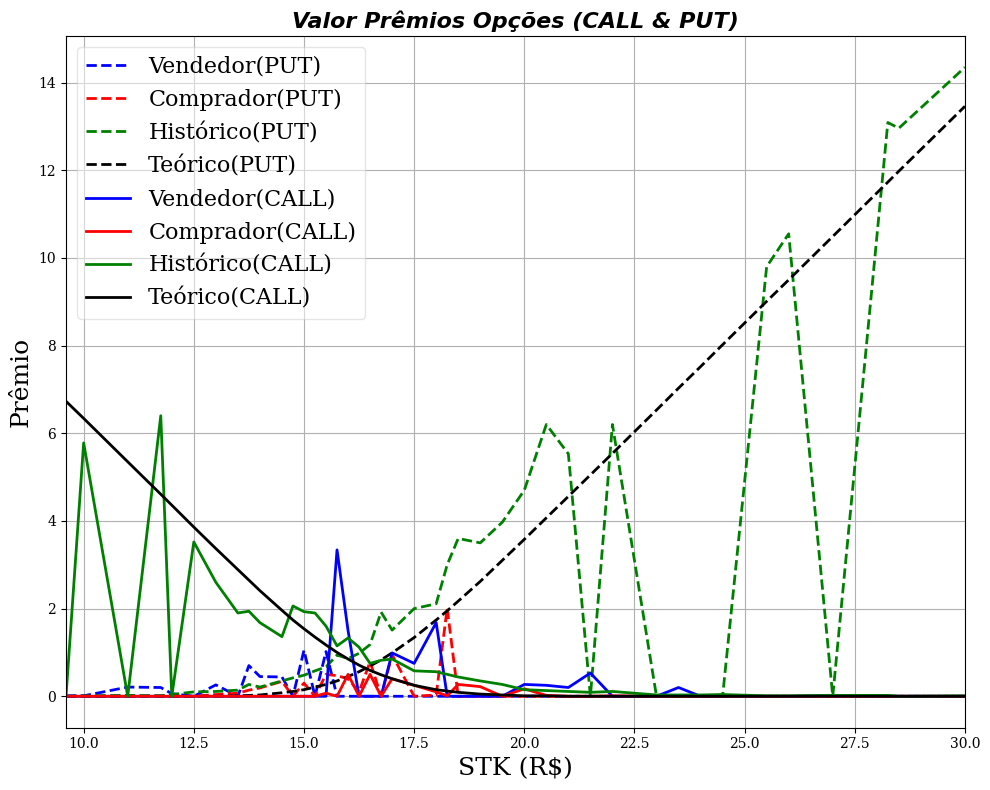

In [117]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,8))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Ask.1'],label='Vendedor(PUT)', color='blue',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid.1'],label='Comprador(PUT)', color='red',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Ask'],label='Vendedor(CALL)', color='blue', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid'],label='Comprador(CALL)', color='red', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

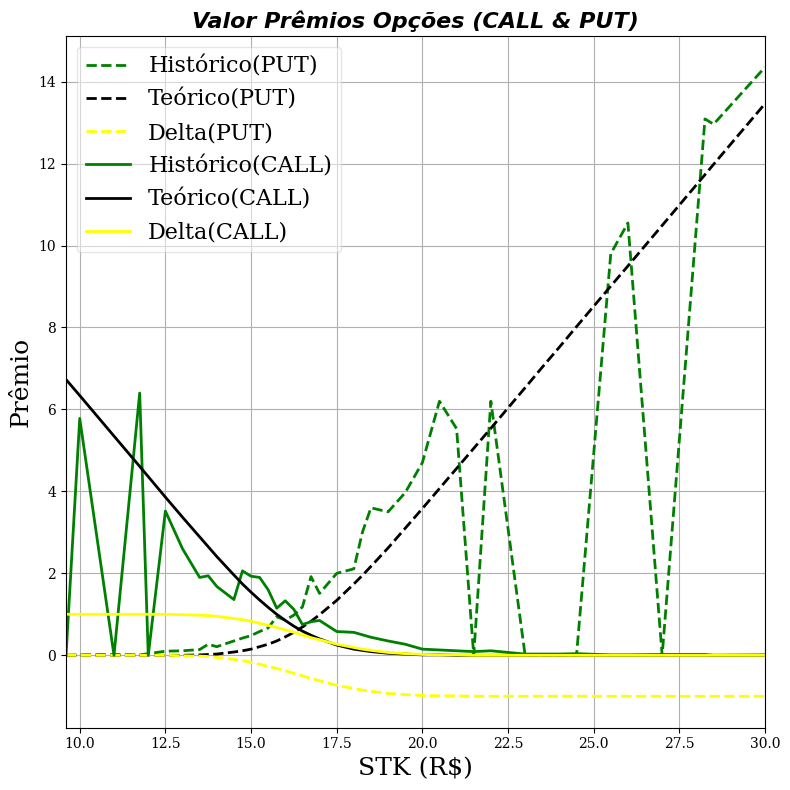

In [118]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,8))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta.1'],label='Delta(PUT)', color='yellow',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta'],label='Delta(CALL)', color='yellow', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

#Conclusões:


In [119]:
PUTs_OTM

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,6.73,1.00,-0.0050,6.64,-6.64,0.00,0.00,9.60,0.00,0.01,0.00,0.0,0.0000,0.00,0.00,0.00
1,5.78,6.34,1.00,-0.0052,6.24,-0.46,0.00,0.00,10.00,0.00,0.01,0.01,0.0,0.0000,0.00,0.00,0.01
2,0.00,5.35,1.00,-0.0057,5.24,-5.24,0.00,0.00,11.00,0.00,0.21,0.02,0.0,0.0000,0.00,0.00,0.02
3,6.40,4.61,1.00,-0.0061,4.49,1.91,0.00,0.00,11.75,0.01,0.20,0.01,0.0,0.0000,0.00,0.00,0.01
4,0.00,4.36,1.00,-0.0063,4.24,-4.24,0.00,0.00,12.00,0.00,0.06,0.04,0.0,-0.0001,0.00,0.00,0.04
5,3.52,3.86,1.00,-0.0068,3.74,-0.22,0.00,0.00,12.50,0.00,0.00,0.10,0.0,-0.0003,0.00,0.00,0.10
6,2.60,3.37,0.99,-0.0076,3.24,-0.64,0.00,0.00,13.00,0.04,0.26,0.11,0.0,-0.0009,-0.01,0.00,0.11
7,1.90,2.89,0.98,-0.0089,2.74,-0.84,0.00,0.00,13.50,0.07,0.00,0.14,0.0,-0.0020,-0.02,0.01,0.14
8,1.94,2.65,0.97,-0.0099,2.49,-0.55,0.00,0.00,13.75,0.14,0.70,0.27,0.0,-0.0028,-0.03,0.02,0.27
9,1.68,2.41,0.95,-0.0111,2.24,-0.56,0.00,0.00,14.00,0.19,0.45,0.21,0.0,-0.0038,-0.05,0.03,0.21


In [120]:
PUTs_OTM.describe()

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000
mean,2.067647,3.069412,0.900000,-0.011618,2.837059,-0.769412,0.033529,0.284706,13.402941,0.144706,0.259412,0.306471,0.0,-0.004682,-0.100000,0.098824,0.306471
std,1.769825,1.867563,0.126935,0.005813,1.993934,2.361635,0.121395,0.867022,1.993934,0.184191,0.357115,0.306389,0.0,0.004886,0.126935,0.141062,0.306389
min,0.000000,0.850000,0.620000,-0.020800,0.240000,-6.640000,0.000000,0.000000,9.600000,0.000000,0.000000,0.000000,0.0,-0.012600,-0.380000,0.000000,0.000000
25%,1.330000,1.540000,0.830000,-0.016900,1.240000,-0.640000,0.000000,0.000000,12.000000,0.000000,0.000000,0.040000,0.0,-0.009100,-0.170000,0.000000,0.040000
50%,1.900000,2.650000,0.970000,-0.009900,2.490000,-0.380000,0.000000,0.000000,13.750000,0.040000,0.060000,0.210000,0.0,-0.002800,-0.030000,0.020000,0.210000
75%,2.060000,4.360000,1.000000,-0.006300,4.240000,0.690000,0.000000,0.000000,15.000000,0.300000,0.440000,0.480000,0.0,-0.000100,0.000000,0.150000,0.480000
max,6.400000,6.730000,1.000000,-0.005000,6.640000,1.910000,0.500000,3.340000,16.000000,0.500000,1.050000,0.940000,0.0,0.000000,0.000000,0.450000,0.940000


In [123]:
P_max = PUTs_OTM.iat[-1,11]
P_max

0.86

In [124]:
Linha_P_max = PUTs_OTM[(PUTs_OTM['Ask.1'] >= P_max)]
Strike_Pmax = Linha_P_max.iat[0,8]
Strike_Pmax

15.0

In [80]:
Prêmio_perc = P_max/Strike_Pmax
Prêmio_perc

0.1285714285714286

In [81]:
Delta_min = PUTs_OTM['Delta.1'].max()
Index_min = PUTs_OTM['Delta.1'].idxmax()
Delta_min

-0.01

In [82]:
Index_min

0

In [83]:
Strike_Deltamin = PUTs_OTM.iat[Index_min,8]
Strike_Deltamin

0.3

In [86]:
Delta_Ativo_perc = (Ativo -Strike_Deltamin)/Ativo
Delta_Ativo_perc

Adj Close    0.594595
Name: 2023-09-21 00:00:00, dtype: float64

*   A inclinação para um prêmio de 1% num delta de 25% seria de 4%;
*   A inclinação para um prêmio de 1% num delta de 50% seria de 2%;
*   Se a inclinação é maior (Muito prêmio e pouco Delta);
*   Combinado com baixa volatilidade é uma oportunidade.



In [89]:
Inclinação = Prêmio_perc/Delta_Ativo_perc
Inclinação

Adj Close    0.216234
Name: 2023-09-21 00:00:00, dtype: float64